## IMPORT

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
print("We are using TensorFlow: ", tf.__version__)
print("We are using Keras: ", keras.__version__)

We are using TensorFlow:  2.6.0
We are using Keras:  2.6.0


## GPU Check

In [5]:
# Check if GPU works
print(tf.test.gpu_device_name())
# GPU cout and name
!nvidia-smi -L

/device:GPU:0
GPU 0: NVIDIA GeForce GTX 1050 Ti (UUID: GPU-fa68e8f4-96f0-d795-a3d2-b6344f49a27e)


In [6]:
# GPU activity
!nvidia-smi

Mon Aug  1 23:20:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:08:00.0  On |                  N/A |
| 30%   32C    P8    N/A /  75W |   1509MiB /  4096MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## MNIST

In [7]:
# Data downloading
(x_train, y_train),(x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [10]:
# Data shape
print(x_train.shape)
print(y_train.shape)
print(y_train[:10])

(60000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4]


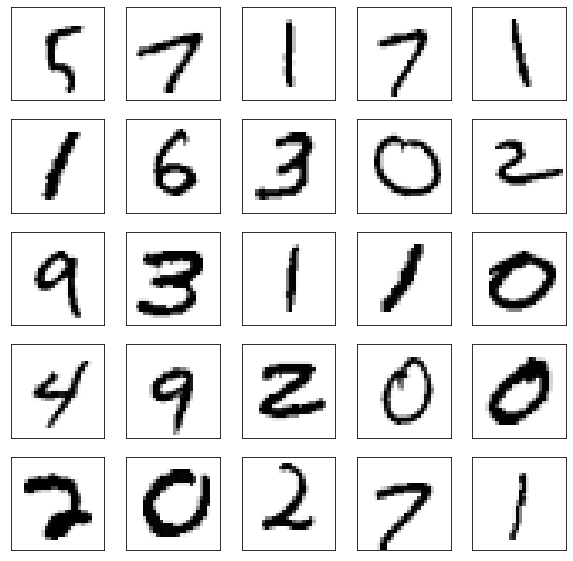

In [32]:
# Show Images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i+100], cmap="Greys")


In [33]:
# Reshape Data
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train.shape, x_train_flat.shape)

x_val_flat =  x_val.reshape(-1, 28*28).astype(float)
print(x_val.shape, x_val_flat.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


In [35]:
# Rescaling Data
x_train_float = x_train_flat.astype(float) / 255 - 0.5
x_val_float = x_val_flat.astype(float) / 255 - 0.5

# # Without Rescaling
# x_train_float = x_train_flat.astype(float)
# x_val_float = x_val_flat.astype(float)

In [37]:
# One-hot encoding
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


## Multi Layer Perceptron (MLP) Keras

In [38]:
clear_session()

In [40]:
# Neural Network Architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_float.shape[1],)))
model.add(Dense(128, activation='relu',))
model.add(Dense(10, activation='softmax',))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
